# Reuben Quinto - News Mood

In [129]:
import json
import tweepy
from datetime import datetime
import time
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt

from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

twitter = {
    "user":[],
    "text":[],
    "created_at":[],
    "compound":[],
    "positive":[],
    "neutral":[],
    "negative":[]
}

target = ["BBC", "CBS", "CNN", "FoxNews", "nytimes"]

In [130]:
for t in target:

    for x in range(1,6):
        
        for i in api.user_timeline(t, page=x):
            twitter["user"].append(i["user"]["name"])
            twitter["text"].append(i["text"])
            twitter["created_at"].append(datetime.strptime(i["created_at"],"%a %b %d %H:%M:%S %z %Y"))

print("Loop Completed")

Loop Completed


In [131]:
print(twitter)

{'user': ['BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'BBC', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CBS', 'CB

In [132]:
for i in range(len(twitter["user"])):
    twitter["compound"].append(SentimentIntensityAnalyzer().polarity_scores(twitter["text"][i])["compound"])
    twitter["positive"].append(SentimentIntensityAnalyzer().polarity_scores(twitter["text"][i])["pos"])
    twitter["neutral"].append(SentimentIntensityAnalyzer().polarity_scores(twitter["text"][i])["neu"])
    twitter["negative"].append(SentimentIntensityAnalyzer().polarity_scores(twitter["text"][i])["neg"])

In [133]:
print(len(twitter["user"]))
print(len(twitter["text"]))
print(len(twitter["created_at"]))
print(len(twitter["compound"]))
print(len(twitter["positive"]))
print(len(twitter["neutral"]))
print(len(twitter["negative"]))

500
500
500
500
500
500
500


In [134]:
twitter_df = pd.DataFrame(twitter, columns=["user",
                                            "text",
                                            "created_at",
                                            "compound",
                                            "positive",
                                            "neutral",
                                            "negative"])
twitter_df.head(10)

user                                               text  \
0  BBC  Three things you might not know about domestic...   
1  BBC  📖👀 The boy who has written a book with his eye...   
2  BBC  A pest controller who discovered a nest with "...   
3  BBC  🎶 'A lower volume of music encourages healthie...   
4  BBC  Today is #YorkshireDay! Why not celebrate by e...   
5  BBC  RT @BBC6Music: 🎧 Which records are you still w...   
6  BBC  ✈️ A woman, who fulfilled her air hostess moth...   
7  BBC  RT @BBCLeeds: What if animals spoke in a Yorks...   
8  BBC  RT @bbcrb: We all know SOMEONE  who needs to d...   
9  BBC  🍣🎣 How did we become hooked on sushi? https://...   

                 created_at  compound  positive  neutral  negative  
0 2018-08-01 18:01:06+00:00   -0.6369     0.000    0.682     0.318  
1 2018-08-01 16:02:02+00:00    0.0000     0.000    1.000     0.000  
2 2018-08-01 14:03:04+00:00    0.0000     0.000    1.000     0.000  
3 2018-08-01 13:00:29+00:00    0.1779     0.137    0.758     0.104  
4 2018-08-01 12:02:03+00:00   -0.5090     0.000    0.829     0.171  
5 2018-08-01 11:56:31+00:00    0.0000     0.000    1.000     0.000  
6 2018-08-01 11:00:09+00:00    0.5859     0.211    0.789     0.000  
7 2018-08-01 09:20:33+00:00    0.6114     0.266    0.734     0.000  
8 2018-08-01 09:20:00+00:00    0.0000     0.000    1.000     0.000  
9 2018-08-01 08:01:06+00:00    0.0000     0.000    1.000     0.000

In [135]:
twitter_df.sort_values("created_at", inplace=True)
twitter_df.reset_index(drop=True, inplace=True)
twitter_df.head(10)

user                                               text  \
0  CBS  RT if that musical number by the cast of Carou...   
1  CBS  RT @McBenefit: I love everything about you @Uz...   
2  CBS  So many feels at the #TonyAwards. Congratulati...   
3  CBS  .@Matt_Morrison welcomes the Marjory Stoneman ...   
4  CBS  Such a touching moment at the #TonyAwards. ❤️ ...   
5  CBS                  RT @KatLargent: MAGIC #TonyAwards   
6  CBS  RT @IzzyNY202: How impressive are these Marjor...   
7  CBS  .@SaraBareilles is totally a Gryffindor. #Tony...   
8  CBS  Glenda Jackson wins Best Leading Actress in a ...   
9  CBS  RT @anna_villanueva: Magnificent performance f...   

                 created_at  compound  positive  neutral  negative  
0 2018-06-11 01:08:28+00:00    0.1511     0.102    0.898     0.000  
1 2018-06-11 01:12:31+00:00    0.6369     0.375    0.625     0.000  
2 2018-06-11 01:19:59+00:00    0.9151     0.457    0.543     0.000  
3 2018-06-11 01:24:12+00:00    0.4019     0.162    0.838     0.000  
4 2018-06-11 01:24:46+00:00    0.0000     0.000    1.000     0.000  
5 2018-06-11 01:25:59+00:00    0.0000     0.000    1.000     0.000  
6 2018-06-11 01:26:03+00:00    0.7351     0.296    0.625     0.079  
7 2018-06-11 01:29:21+00:00    0.0000     0.000    1.000     0.000  
8 2018-06-11 01:30:56+00:00    0.8834     0.563    0.437     0.000  
9 2018-06-11 01:37:36+00:00    0.6360     0.276    0.724     0.000

In [136]:
twitter_df.to_csv("news_mood_df.csv", encoding="utf-8")

In [140]:
twitter_df["user"].unique()

array(['CBS', 'BBC', 'The New York Times', 'Fox News', 'CNN'],
      dtype=object)

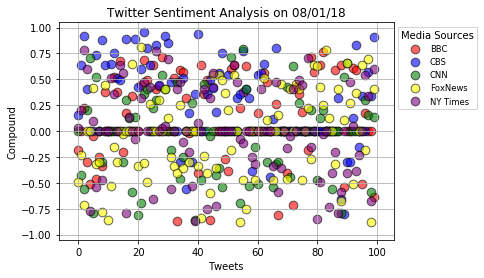

In [156]:
plt.scatter(np.arange(100), 
            twitter_df[twitter_df["user"] == "BBC"]["compound"],
            edgecolor="black",
            linewidths=1,
            marker="o",
            color="Red",
            s=75,
            alpha=0.6,
            label="BBC")

plt.scatter(np.arange(100), 
            twitter_df[twitter_df["user"] == "CBS"]["compound"],
            edgecolor="black",
            linewidths=1,
            marker="o",
            color="Blue",
            s=75,
            alpha=0.6,
            label="CBS")

plt.scatter(np.arange(100), 
            twitter_df[twitter_df["user"] == "CNN"]["compound"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            color="Green", 
            s=75,
            alpha=0.6, 
            label="CNN")

plt.scatter(np.arange(100), 
            twitter_df[twitter_df["user"] == "Fox News"]["compound"],
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            color="Yellow", 
            s=75,
            alpha=0.6, 
            label="FoxNews")

plt.scatter(np.arange(100), 
            twitter_df[twitter_df["user"] == "The New York Times"]["compound"],
            edgecolor="black",
            linewidths=1,
            marker="o",
            color="Purple",
            s=75,
            alpha=0.6,
            label="NY Times")

plt.title("Twitter Sentiment Analysis on 08/01/18")
plt.ylabel("Compound")
plt.xlabel("Tweets")
# plt.xlim([-105, 105])
# plt.xticks([-20, 0, 20, 40, 60, 80, 100])
plt.ylim([-1.05, 1.05])
plt.grid(True)

legend = plt.legend(fontsize="small",
                    mode="expanded",
                    scatterpoints=1,
                    loc="upper left",
                    bbox_to_anchor=(1,1),
                    title="Media Sources",
                    labelspacing=0.5)


plt.savefig("Scatter.png", bbox_extra_artists=(legend, ), bbox_inches="tight")

plt.show()

In [190]:
# Create: vader df
vader_df = twitter_df.groupby(["user"]).mean()["compound"]

C:\Users\Reube\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


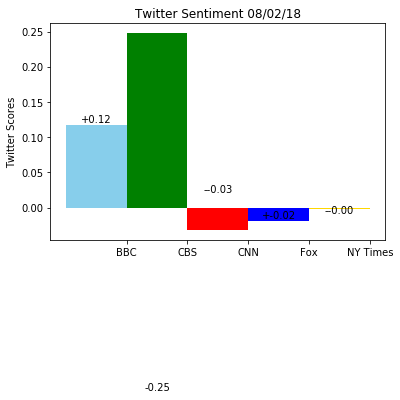

In [191]:
# Create: Variable
tweets_compound = (vader_df["BBC"],
                   vader_df["CBS"],
                   vader_df["CNN"],
                   vader_df["Fox News"],
                   vader_df["The New York Times"])

# Create: Bar Graph
fig, ax = plt.subplots()
ind = np.arange(len(tweets_compound))  
width = 1
rect1 = ax.bar(ind[0], tweets_compound[0], width, color="skyblue")
rect2 = ax.bar(ind[1], tweets_compound[1], width, color="green")
rect3 = ax.bar(ind[2], tweets_compound[2], width, color="red")
rect4 = ax.bar(ind[3], tweets_compound[3], width, color='blue')
rect5 = ax.bar(ind[4], tweets_compound[4], width, color='gold')

# Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Create: Headers. 
ax.set_ylabel("Twitter Scores")
ax.set_title("Twitter Sentiment 08/02/18")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NY Times"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save: Graph
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig("Bar Chart.png")

fig.show()

# Observable Trends:

1. CBS posts the most positive content
2. CNN posts the most negative content
3. Over a long period of time it appears that all media sources post frequent non biased posts